# Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

## Approach : A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

## Random Forest is a
        popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting. 



In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Loading dataset
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Descriptive Statistics 

In [3]:
data.isna().sum().sum() 

0

In [4]:
data.duplicated().sum() 

0

In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
#categorical_features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('categorical_features:', categorical_features) 

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [9]:
#numerical_features

numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n') 

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



# Feature Engineering

In [10]:
#Converting sales into categorical feature
# we will make 3 categories in sales like low, medium and good sales. 

<AxesSubplot:xlabel='Sales', ylabel='Count'>

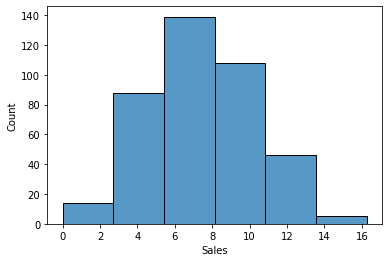

In [11]:
sns.histplot(data.Sales, bins=6)
#Almost normal distribution

In [12]:
data.Sales.max() / 3 

# diving by 3 since we are making 3 categories
# each category with width 5.42

5.423333333333333

In [13]:
data1 = data.copy()
data1['Sales_category'] = pd.cut(x = data1['Sales'], bins = [0, 5.5 ,11, 17], labels=['Low','Medium','High'], right = False)
data1 = data1.drop(columns=['Sales'])

In [14]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [15]:
data1.Sales_category.value_counts()

Medium    248
Low       103
High       49
Name: Sales_category, dtype: int64

# Visualisation 

<AxesSubplot:xlabel='Sales_category', ylabel='count'>

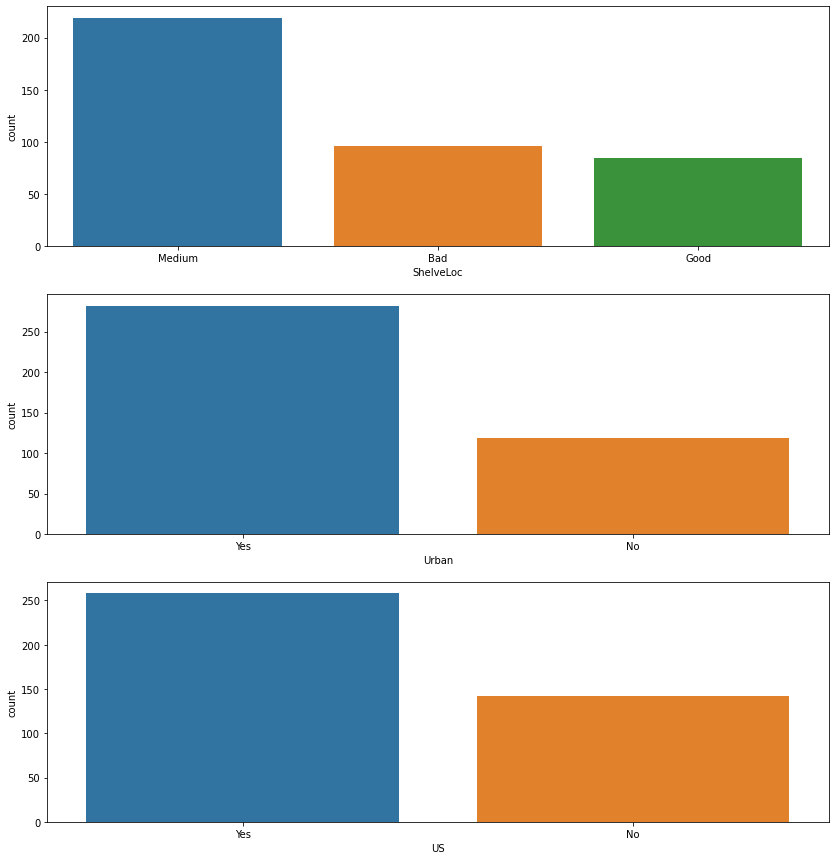

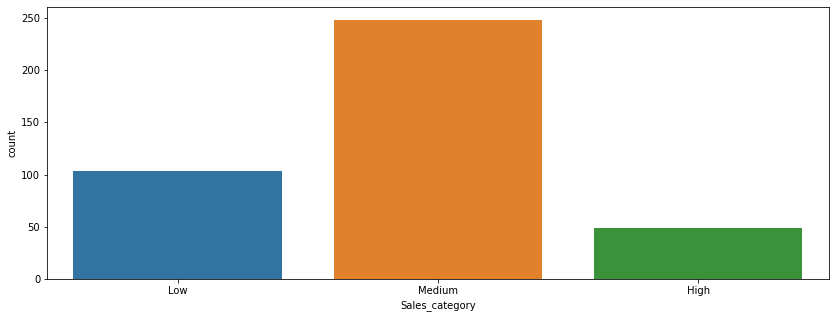

In [16]:
# for categorical_features -- barplot
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(data[categorical_features[i]],ax=axes[i], order=data[categorical_features[i]].value_counts().index)

plt.figure(figsize=(14,5))
sns.countplot(data1['Sales_category'])

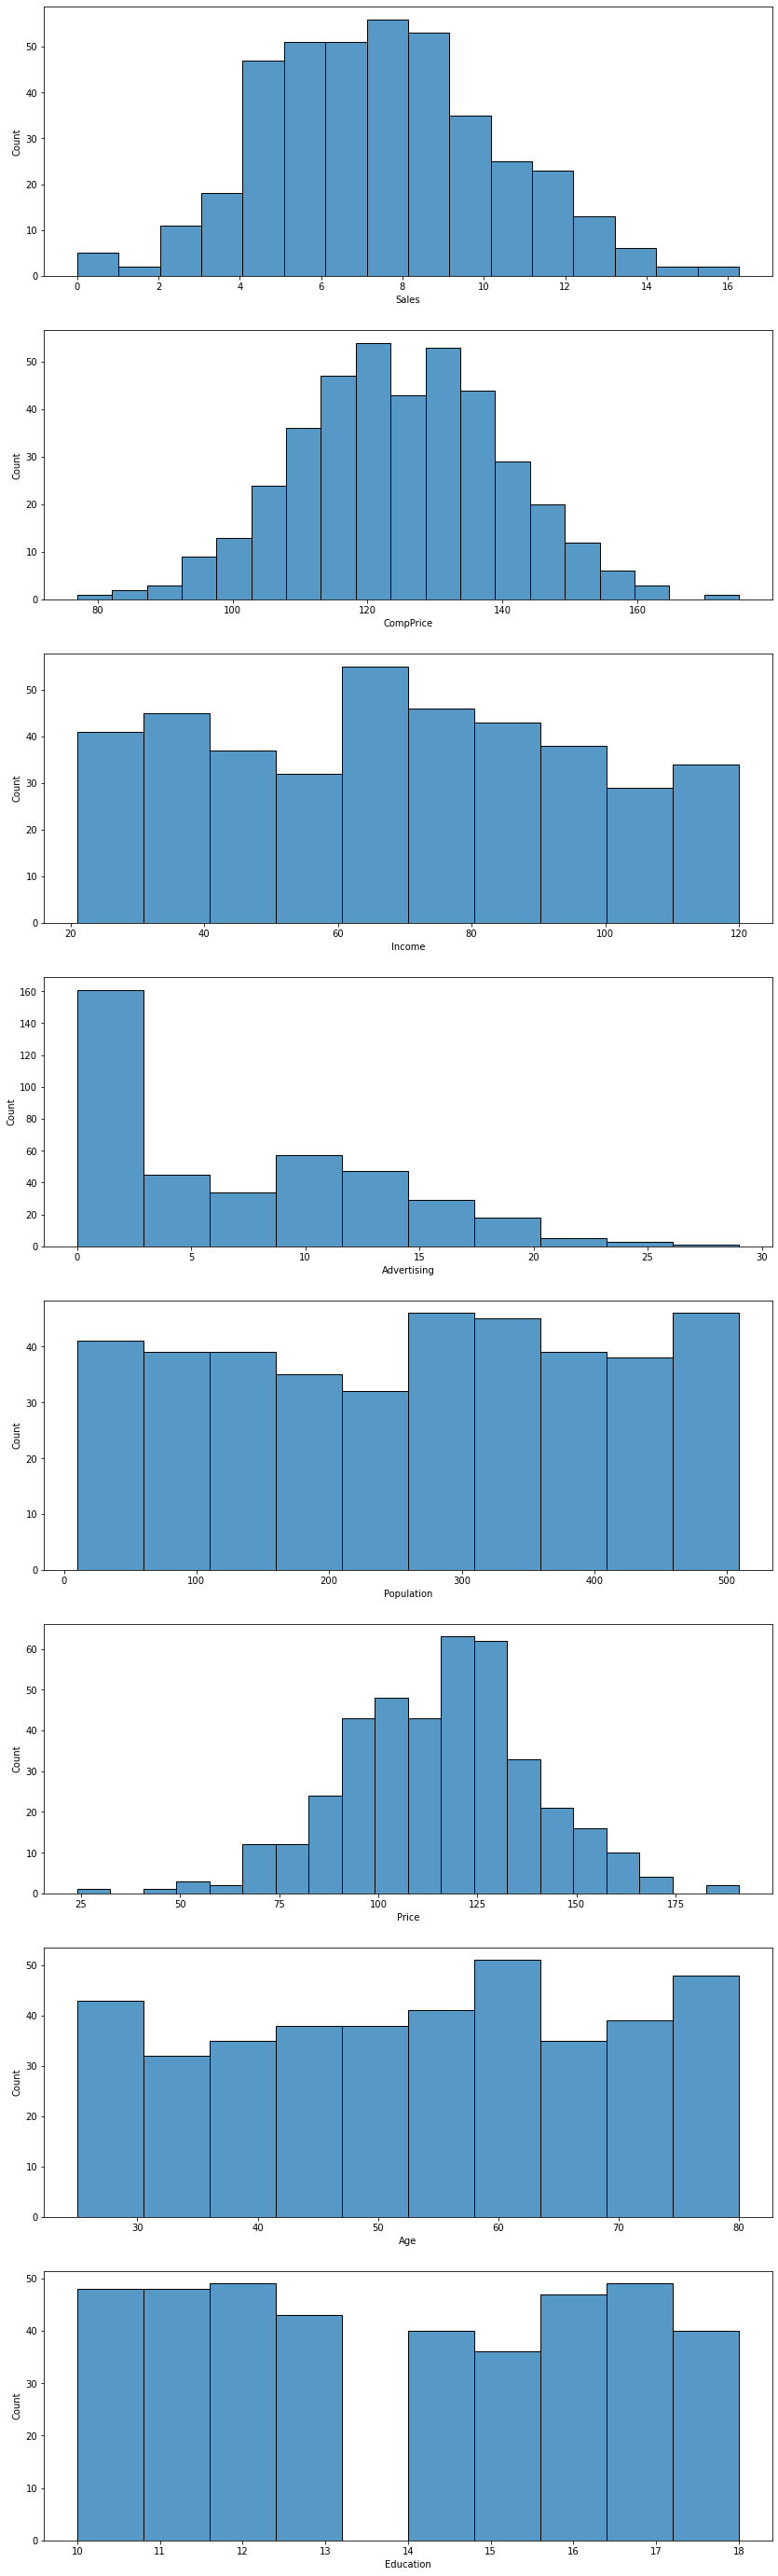

In [17]:
# for numerical_features -- histogram
fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,50))

for i in range (0, len(numeric_features)):
    sns.histplot(data[numeric_features[i]],ax=axes[i])
     

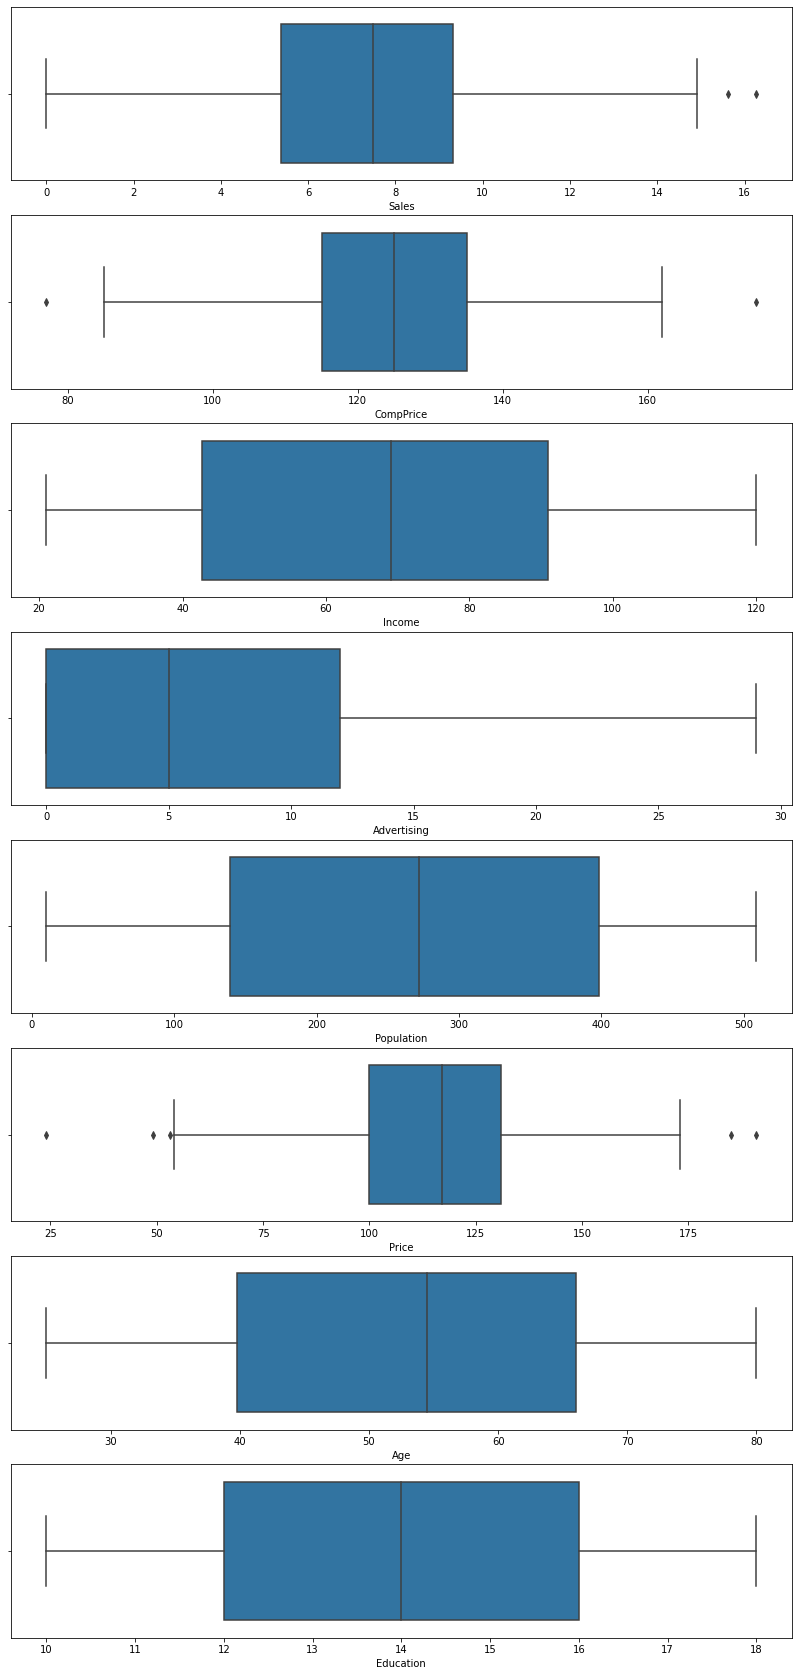

In [18]:
# Boxplot for outlier detection

fig, axes=plt.subplots(len(numeric_features),1,figsize=(14,30))

for i in range (0, len(numeric_features)):
    sns.boxplot(data[numeric_features[i]],ax=axes[i])
    

In [19]:
data2 = data1.copy()

for feature in numeric_features:
    Q1,Q3 = np.percentile(data[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = data[feature][(data[feature] < ll) |  (data[feature] > ul)]
    
    data2=data2.drop(outliers.index[:] , errors="ignore")
    
    outliers=0 

In [20]:
data1.shape 

(400, 11)

In [21]:
data2.shape 

(392, 11)

8 outliers are dropped

# Data Pre-Processing 

In [22]:
y = data2['Sales_category']
x= data2.drop(['Sales_category'], axis=1)  

In [23]:
x = pd.get_dummies(x) # encoding input categorical variables  

In [24]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables
# medium: 2, High:0, Low:1

## Feature selection

In [25]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2 

In [26]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y) 

In [27]:
# summarize scores
scores = fit.scores_
features = fit.transform(x) 

In [28]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df 

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


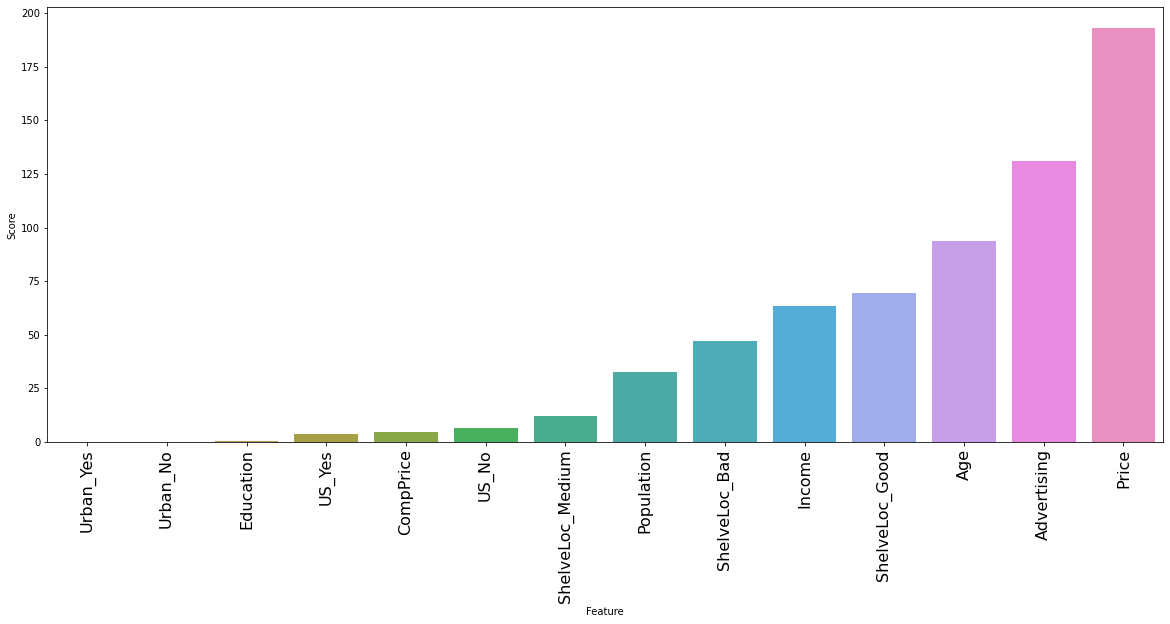

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature) 
plt.xticks(rotation = 90, fontsize = 16)
plt.show() 

In [30]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]
model_data_x.head()

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141


In [31]:
model_data_y = y 
model_data_y[:5] 

array([2, 0, 2, 2, 1])

In [32]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

In [33]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)  

Shape of X_train:  (313, 10)
Shape of X_test:  (79, 10)
Shape of y_train:  (313,)
Shape of y_test (79,)


# Building Random Forest Classifier 

In [34]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, model_data_x, model_data_y, cv=kfold)

print('Batchwise accuracy is:', '\n', results, '\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.65       0.625      0.71794872 0.74358974 0.76923077 0.58974359
 0.71794872 0.74358974 0.74358974 0.69230769] 

Overall accuracy is: 0.6992948717948718


## Grid search for hyper parameter tuning 

In [35]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(model_data_x, model_data_y) 

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [36]:
print(grid.best_score_)
print(grid.best_params_)  

0.7248076923076923
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 125}


## Building final model on grid.best_params_ parameters

In [37]:
model_kf =grid.best_estimator_
model_kf.fit(model_data_x, model_data_y)

results = cross_val_score(model_kf, model_data_x, model_data_y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3))  

Accuracy with k fold validation 0.725


In [38]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred)) 

Accuracy with train test split: 0.6582278481012658


In [39]:
print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.50      0.26      0.34        19
           2       0.69      0.87      0.77        52

    accuracy                           0.66        79
   macro avg       0.56      0.46      0.48        79
weighted avg       0.63      0.66      0.62        79



<AxesSubplot:>

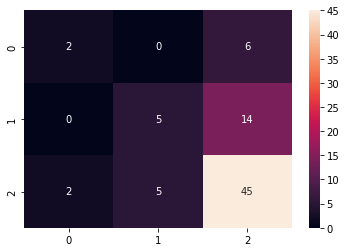

In [40]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 

# Thank You 